<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel('/content/drive/MyDrive/PROJETS OPENCLASSROOMS/PROJET 6/web.xlsx')
#Importation du fichier erp.xlsx
df_erp=pd.read_excel('/content/drive/MyDrive/PROJETS OPENCLASSROOMS/PROJET 6/erp.xlsx')
#importation du fichier liaison.xlsx
df_liaison=pd.read_excel('/content/drive/MyDrive/PROJETS OPENCLASSROOMS/PROJET 6/liaison.xlsx')

FileNotFoundError: ignored

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
L'étudiant va être très certainement confronté à des difficultés pour ouvrir ce fichier.
Il faudra donc qu'il se documente sur les points suivants:<br>
- notion d'encodage en informatique. ("UTF-8", "ISO-8859-1", etc)<br>
- manipulation de fichier csv, tsv, etc<br>
<br>
Pour lui faire réussir cette étape, l'étudiant devrait suivre ces directives:<br>
- Explorer le fichier à l'aide d'un outil comme Notepad++ afin de visualiser la structure du fichier<br>
- ... ou d'utiliser Excel pour les mêmes raisons. Mais dans ce cas l'étudiant pourrait être tenté de convertir le fichier csv en xlsx, ce que je ne recommande pas: si le fichier est trop gros pour Excel cela deviendra une souffrance de procéder ainsi<br>
- apprendre à ourvrir un fichier avec python à l'aide de l'instruction suivante: <code>with open(nom_fichier, "rb") as f: </code><br>
- utiliser une bibliothèque comme <code>chardet</code> pour tenter d'identifier l'encodage du fichier<br>
</div>

In [ ]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("/content/drive/MyDrive/PROJETS OPENCLASSROOMS/PROJET 6/caracteristiques_vins.csv", "rb") as f:
    file = f.read()
    
#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [ ]:
#Vous avez dû constater que les champs sont séparées par des point-virgule

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv("/content/drive/MyDrive/PROJETS OPENCLASSROOMS/PROJET 6/caracteristiques_vins.csv", sep=";")

UnicodeDecodeError: ignored

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [ ]:
#Importation de la bibilothèque 
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [ ]:
#Identification de l'encodage du fichier
chardet.detect(file)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [ ]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "/content/drive/MyDrive/PROJETS OPENCLASSROOMS/PROJET 6/caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


> **Il y a 825 lignes, aucune n'est nulle.**

In [ ]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons=df_erp.duplicated(['product_id'])
print('Nombre de doublons :', doublons.sum())

Nombre de doublons : 0


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
uni_stock_status=df_erp['stock_status'].unique()
print('valeurs distinctes :', uni_stock_status)
#À quelle(s) autre(s) colonne(s) sont-elles liées ?

valeurs distinctes : ['outofstock' 'instock']


> **La colonne stock_status est liée à la colonne Stock_quantity** 


In [ ]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
def calculate_stock_status_2(stock_quantity):
  if (stock_quantity)==0:
      return 'outofstock'
  else:
      return 'instock'

df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(calculate_stock_status_2)
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,instock
821,7204,0,45.0,9,instock,instock
822,7247,1,54.8,23,instock,instock
823,7329,0,26.5,14,instock,instock


In [ ]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [ ]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

In [ ]:
df_stock_comp=df_erp["stock_status"] == df_erp["stock_status_2"]
df_stock_comp.sum()

824

In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [ ]:
#Corriger la ou les données incohérentes
diff_ligne = df_erp.loc[df_erp['stock_status'] != df_erp['stock_status_2']]
print(diff_ligne)

     product_id  onsale_web  price  stock_quantity stock_status stock_status_2
443        4954           1   25.0               0      instock     outofstock


> **la valeur 'instock' est fausse car elle est en relation avec la valeur 'stock_quantity' qui est à 0. La valeur de 'stock_status' devrait être 'outofstock'**

In [ ]:
#correction de la valeur par remplacement 
df_erp.loc[443, 'stock_status']='outofstock'

> **Vérification de la DataFrame**




In [ ]:
diff_ligne = df_erp.loc[df_erp['stock_status'] != df_erp['stock_status_2']]
print(diff_ligne)

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, stock_status_2]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isna().sum())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("Le prix minimum est de: {}".format(df_erp['price'].min()))
#Afficher le prix maximum de la colonne "price"
print("Le prix maximum est de: {}".format(df_erp['price'].max()))

Nombres d'article avec un prix non renseignés: 0
Le prix minimum est de: 5.2
Le prix maximum est de: 225.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("La quantité minimum est de: {}".format(df_erp['stock_quantity'].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("La quantité maximum est de: {}".format(df_erp['stock_quantity'].max()))

La quantité minimum est de: 0
La quantité maximum est de: 578


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
valeur_onsale_web=df_erp['onsale_web'].unique()
print('les valeurs contenues dans la colonne onsale_web sont: ', valeur_onsale_web)

les valeurs contenues dans la colonne onsale_web sont:  [1 0]


In [ ]:
#Visualisation de la colone onsale_web
df_filtered = df_erp[df_erp['onsale_web'] == 0]
df_filtered


,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
19,4055,0,86.1,0,outofstock,outofstock
49,4090,0,73.0,0,outofstock,outofstock
50,4092,0,47.0,0,outofstock,outofstock
119,4195,0,14.1,0,outofstock,outofstock
131,4209,0,73.5,0,outofstock,outofstock
...,...,...,...,...,...,...
818,7200,0,31.0,6,instock,instock
819,7201,0,31.0,18,instock,instock
820,7203,0,45.0,30,instock,instock
821,7204,0,45.0,9,instock,instock


> **Les valeurs contenues dans la colonne onsale_web sont des valeurs booléennes. Elles précisent si les articles sont vendues sur le site ou non. Ces 108 articles n'étant pas en vente sur le site, ils ne sont pas intégrés dans l'analyse. Nous décidons donc de les retirer du dataframe final**

In [ ]:
df_erp = df_erp[df_erp['onsale_web'] != 0]

In [ ]:
#Quelles sont les colonnes à conserver selon vous?

> **Les colonnes à conserver: product_id, onsale_web, price et stock_quantity**

In [ ]:
#Supprimer les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp.drop(columns=['stock_status','stock_status_2'], inplace=True )

<ipython-input-30-853f0db2a81a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp.drop(columns=['stock_status','stock_status_2'], inplace=True )


In [ ]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity
0,3847,1,24.2,0
1,3849,1,34.3,0
2,3850,1,20.8,0
3,4032,1,14.1,0
4,4039,1,46.0,0


In [ ]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 824
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      717 non-null    int64  
 1   onsale_web      717 non-null    int64  
 2   price           717 non-null    float64
 3   stock_quantity  717 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [ ]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [ ]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
#Selon vous, quelles sont les colonnes à conserver ?

> **Les colonnes à conserver sont toutes les colonnes comportant des entrées. Les colonnes 'tax_class', 'post_content', 'post_password' et 'post_content_filtered' sont vides, on peut donc les supprimer.**

In [ ]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(columns=['tax_class', 'post_content','post_password', 'post_content_filtered'],inplace=True)

In [ ]:
#Visualisation des valeurs de la colonne sku
df_web['sku']
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

0       bon-cadeau-25-euros
1                     15298
2                     15296
3                     15300
4                     19814
               ...         
1508                  16135
1509                  15891
1510                  15887
1511                13127-1
1512                  16230
Name: sku, Length: 1513, dtype: object

In [ ]:
# visualisation des valeurs non numériques.
# Conversion des valeurs non numériques en NaN
df_web['sku_temp'] = pd.to_numeric(df_web['sku'], errors='coerce')

# Filtrage des lignes contenant des NaN dans la colonne 'sku_temp'
non_numeric_rows = df_web[df_web['sku_temp'].isna()]

# Affichage des lignes avec des valeurs non numériques dans la colonne 'sku'
non_numeric_rows

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku_temp
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,NaN


In [ ]:
#Pour les codes articles identifiés, réalisez une analyse et définissez l'action à entreprendre

> **Il y a une valeur non numérique 'bon-cadeau-25-euros'**

In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
ligne_cadeau = df_web[df_web['sku'] == 'bon-cadeau-25-euros']
ligne_cadeau

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku_temp
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,NaN


> **Ce bon cadeau rentre dans le chiffre d'affaire, mais pas dans la gestion du stock. Le SKU n'étant pas correctement renseigné, il ne va correspondre à aucune ligne. Nous préférons les supprimer.**

In [ ]:
df_web.drop ([0, 1209], axis=0, inplace=True)

> **Il y a une valeur avec un '-'**

In [ ]:
ligne_trait = df_web[df_web['sku'] ==- '131271']
ligne_trait

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku_temp
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,NaN


> **Deux lignes identiques, avec aucune vente. Nous préférons les supprimer.**

In [ ]:
df_web.drop ([797, 1511], axis=0, inplace=True)

In [ ]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
doublon=df_web.duplicated(['sku'])
print('Nombre de doublons :', doublon.sum())

Nombre de doublons : 796


In [ ]:
#Identifier les lignes sans code articles
sku_isna=df_web['sku'].isnull()
print("Nombres de lignes sku non renseignées: {}".format(sku_isna.sum()))
sku_isna


Nombres de lignes sku non renseignées: 85


1       False
2       False
3       False
4       False
5       False
        ...  
1507    False
1508    False
1509    False
1510    False
1512    False
Name: sku, Length: 1509, dtype: bool

In [ ]:
# visualisation des valeurs non numériques.
# Conversion des valeurs non numériques en NaN
df_web['sku_temp'] = pd.to_numeric(df_web['sku'], errors='coerce')

# Filtrage des lignes contenant des NaN dans la colonne 'sku_temp'
non_numeric_rows = df_web[df_web['sku_temp'].isna()]

# Affichage des lignes avec des valeurs non numériques dans la colonne 'sku'
non_numeric_rows

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku_temp
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Les lignes sans code article semble être toutes non renseignées
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
null_sku_df = df_web.loc[df_web['sku'].isnull()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
null_sku_df.info()
#3 - Que constatez-vous?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  post_title         2 non-null      object        
 11  post_excerpt       2 non-null      object        
 12  post_status        2 non-null      object        
 13  comment_status     2 non-null      object        
 14  ping_stat

> **les lignes sku non renseignées ne sont pas toutes vides.**
*   3 colonnes sont totalement renseignées (Virtual, downloadable et rating_count) mais avec une valeur à 0.
*   toutes les autres colonnes sauf post_mime_type ont deux lignes renseignées. Nous décidons de les supprimer



In [ ]:
#Suppression des codes articles null
df_web = df_web.dropna(subset=['sku'])

In [ ]:
# Suppression de la colonne 'sku_temp' ajoutée temporairement
df_web.drop('sku_temp', axis=1, inplace=True)

<ipython-input-50-4ca4a65af652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web.drop('sku_temp', axis=1, inplace=True)


In [ ]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
doublon=df_web.duplicated(['sku'])
print('Nombre de doublons :', doublon.sum())

Nombre de doublons : 712


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
uni_post_type=df_web['post_type'].unique()
print('valeurs distinctes :', uni_post_type)

valeurs distinctes : ['product' 'attachment']


In [ ]:
post_type_counts = df_web['post_type'].value_counts()
print('\nNombre de chaque valeur distincte :')
print(post_type_counts)


Nombre de chaque valeur distincte :
product       712
attachment    712
Name: post_type, dtype: int64


> **Il y a autant de lignes contenant product que de lignes contenant attachment et elles sont identiques. Nous allons garder uniquement les lignes contentant la valeur product**

In [ ]:
df_web = df_web[df_web['post_type'] == 'product']

In [ ]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                712 non-null    object        
 1   virtual            712 non-null    int64         
 2   downloadable       712 non-null    int64         
 3   rating_count       712 non-null    int64         
 4   average_rating     712 non-null    float64       
 5   total_sales        712 non-null    float64       
 6   tax_status         712 non-null    object        
 7   post_author        712 non-null    float64       
 8   post_date          712 non-null    datetime64[ns]
 9   post_date_gmt      712 non-null    datetime64[ns]
 10  post_title         712 non-null    object        
 11  post_excerpt       712 non-null    object        
 12  post_status        712 non-null    object        
 13  comment_status     712 non-null    object        
 14  ping_statu

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [ ]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
print(df_liaison['product_id'].is_unique)

True


In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
print(df_liaison['id_web'].is_unique)

False


In [ ]:
#Avons-nous des articles sans correspondances?
# Vérifions s'il y a des valeurs nulles dans les colonnes 'id_web' et 'product_id'
null_id_web = df_liaison['id_web'].isna().any()
null_product_id = df_liaison['product_id'].isna().any()

# Affichons les résultats
print("Valeurs nulles dans la colonne 'id_web' :", null_id_web)
print("Valeurs nulles dans la colonne 'product_id' :", null_product_id)

Valeurs nulles dans la colonne 'id_web' : True
Valeurs nulles dans la colonne 'product_id' : False


In [ ]:
# Vérifier les valeurs nulles dans la colonne 'id_web'
nombre_valeurs_nulles = df_liaison['id_web'].isna().sum()

# Afficher le nombre de valeurs nulles
print(f"Nombre de valeurs nulles dans la colonne 'id_web' : {nombre_valeurs_nulles}")

Nombre de valeurs nulles dans la colonne 'id_web' : 91


In [ ]:

# Créer un masque booléen pour les valeurs nulles dans la colonne 'id_web'
masque_valeurs_nulles = df_liaison['id_web'].isna()

# Afficher uniquement les lignes ayant des valeurs nulles dans la colonne 'id_web'
valeurs_nulles_id_web = df_liaison[masque_valeurs_nulles]

print("Lignes avec des valeurs nulles dans la colonne 'id_web' :")
valeurs_nulles_id_web

Lignes avec des valeurs nulles dans la colonne 'id_web' :


,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


> **La présence de valeurs null dans la colonne id_web indique qu'il ne peut pas y avoir de correspondances totales entre les deux colonnes**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [ ]:

#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_caracteristiques.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_caracteristiques.shape[1]))

Le tableau comporte 611 observation(s) ou article(s)
Le tableau comporte 13 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_name                611 non-null    object 
 1   poids                    611 non-null    object 
 2   Région                   586 non-null    object 
 3   Domaine                  577 non-null    object 
 4   Appellation              559 non-null    object 
 5   Couleur                  566 non-null    object 
 6   Cépage                   571 non-null    object 
 7   Millésime                541 non-null    float64
 8   Garde                    569 non-null    object 
 9   Contenance               611 non-null    object 
 10  Degré d'alcool           586 non-null    object 
 11  Température dégustation  574 non-null    object 
 12  Alliance mets            574 non-null    object 
dtypes: float64(1), object(12)
memory usage: 62.2+ KB


In [ ]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [ ]:
#Quels sont les produits avec des informations manquantes?
df_caracteristiques.isna().sum()

post_name                   0
poids                       0
Région                     25
Domaine                    34
Appellation                52
Couleur                    45
Cépage                     40
Millésime                  70
Garde                      42
Contenance                  0
Degré d'alcool             25
Température dégustation    37
Alliance mets              37
dtype: int64

In [ ]:
#Est-il possible de corriger les données manquantes? 

***Exploration des valeurs manquantes de la dataframe df_caracteristiques***

---





### 2.4.1.   Colonne Région

In [ ]:
df_caracteristiques[df_caracteristiques['Région'].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
197,whisky-lord-elcho,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
198,whisky-wemyss-the-hive-12-ans,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
199,whisky-wemyss-the-hive-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"54,50%",NaN,NaN
200,whisky-wemyss-peat-chimney-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN
201,whisky-wemyss-spice-king-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN


**Les valeurs manquantes de la colonnne Région sont dues au fait ques les articles ne sont pas des vins, mais des alcools ou des huiles.**

### 2.4.2.   Colonne Domaine

In [ ]:
df_caracteristiques[df_caracteristiques['Domaine'].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
197,whisky-lord-elcho,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
198,whisky-wemyss-the-hive-12-ans,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
199,whisky-wemyss-the-hive-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"54,50%",NaN,NaN
200,whisky-wemyss-peat-chimney-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN
201,whisky-wemyss-spice-king-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN


**Les valeurs manquantes de la colonnne Région sont dues au fait que les articles ne sont pas des vins, mais des alcools**



###2.4.3.  Colonne Appellation

In [ ]:
df_caracteristiques[df_caracteristiques['Appellation'].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
136,maroc-graillot-thaleb-tandem-syrah-2015,1.5 kg,Vins du Monde,Graillot-Thaleb,NaN,Rouge,Syrah,2015.0,3-5 ans,75cl,13%,16°C,"Couscous, Cuisine méditerranéenne, Grillades, ..."
141,preceptorie-cotes-du-roussillon-coume-marie-2018,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Rouge,"Carignan, Grenache",2019.0,6-8 ans,75cl,15%,16°C,"Grillades, Viande Blanche, Viande rouge"
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
197,whisky-lord-elcho,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
198,whisky-wemyss-the-hive-12-ans,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
199,whisky-wemyss-the-hive-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"54,50%",NaN,NaN


**la plupart des valeurs manquantes sont dues aux alcools ou aux huiles** 



###2.4.4.   Colonne Couleur




In [ ]:
df_caracteristiques[df_caracteristiques['Couleur'].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
66,champagne-mailly-grand-cru-intemporelle-rose-2009,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"40% Chardonnay, 60% Pinot Noir",NaN,10 ans et +,75cl,12%,10°C,"Apéritif, Fruits, Noix de St Jacques, Poissons"
163,domaine-serol-mousseux-turbullent,1.5 kg,Vallée de la Loire,Stéphane Sérol,Vin Mousseux,NaN,Gamay,NaN,3 ans,75cl,"8,50%",9°C,"Apéritif, Desserts"
187,champagne-egly-ouriet-grand-cru-brut-rose,1.5 kg,Champagne,Egly-Ouriet,Champagne,NaN,"35% Chardonnay, 65% Pinot Noir",NaN,3-5 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits"
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN


**Mis à part les alccols qui n'ont pas de caractéristiques de couleurs, la couleur Rosé est manquante. il faut donc la mettre à chaque fois que que le mot Rosé apparait dans post_name**

In [ ]:
# Utiliser une expression régulière pour vérifier si le mot 'rose' entouré de '-' apparaît dans la colonne 'post_name'
regex = r'[-]?rose[-]?'

# Trouver les lignes où 'rose' apparaît dans la colonne 'post_name' et où la colonne 'Couleur' est NaN
condition_couleur = df_caracteristiques['post_name'].str.contains(regex) & df_caracteristiques['Couleur'].isna()

# Remplacer les valeurs NaN de la colonne 'Couleur' par 'rose' lorsqu'elles remplissent la condition
df_caracteristiques.loc[condition_couleur, 'Couleur'] = 'rose'



###2.4.5.   Colonne Cépage




In [ ]:
df_caracteristiques[df_caracteristiques['Cépage'].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
197,whisky-lord-elcho,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
198,whisky-wemyss-the-hive-12-ans,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
199,whisky-wemyss-the-hive-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"54,50%",NaN,NaN
200,whisky-wemyss-peat-chimney-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN
201,whisky-wemyss-spice-king-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN


**Les valeurs NaN correspondent à des alcools ou des huiles, donc pas de cépage car ce ne sont pas des vins. 3 lignes de vins d'Alsace sont des crémants, dont deux rosés. Nous savons que les crémants blancs d'Alsace sont fait à partir de pinot blanc, et les rosés à partir de pinot noir. nous allons remplir ces conditions.**

In [ ]:
# Utiliser une expression régulière pour vérifier si les mots 'cremant' et 'rose' entourés de '-' apparaissent dans la colonne 'post_name'
regex_cremant = r'[-]?cremant[-]?'
regex_rose = r'[-]?rose[-]?'
# Trouver les lignes où 'cremant' et 'rose' apparaissent dans la colonne 'post_name' et où la colonne 'Cépage' est NaN
condition_cremant_rose = (df_caracteristiques['post_name'].str.contains(regex_cremant) & 
             df_caracteristiques['post_name'].str.contains(regex_rose) & 
             df_caracteristiques['Cépage'].isna())
# Remplacer les valeurs NaN de la colonne 'Cépage' par 'Pinot noir' lorsqu'elles remplissent la condition
df_caracteristiques.loc[condition_cremant_rose, 'Cépage'] = 'Pinot noir'

In [ ]:
# Utiliser une expression régulière pour vérifier si les mots 'cremant' et 'rose' entourés de '-' apparaissent dans la colonne 'post_name'
regex_cremant = r'[-]?cremant[-]?'
regex_blanc = r'[-]?blanc[-]?'
# Trouver les lignes où 'cremant' et 'rose' apparaissent dans la colonne 'post_name' et où la colonne 'Cépage' est NaN
condition_cremant_blanc = (df_caracteristiques['post_name'].str.contains(regex_cremant) & 
             df_caracteristiques['post_name'].str.contains(regex_blanc) & 
             df_caracteristiques['Cépage'].isna())
# Remplacer les valeurs NaN de la colonne 'Cépage' par 'Pinot noir' lorsqu'elles remplissent la condition
df_caracteristiques.loc[condition_cremant_blanc, 'Cépage'] = 'Pinot blanc'



###2.4.6.   Colonne Millésime




In [ ]:
df_caracteristiques[df_caracteristiques['Millésime'].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,rose,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,rose,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,darnleys-london-dry-gin-original,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
527,darnleys-london-dry-gin-spiced,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"42,70%",NaN,NaN
528,wemyss-malts-single-cask-scotch-whisky-chai-ca...,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
530,cognac-normandin-mercier-vfc,1.5 kg,NaN,NaN,Cognac,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN


**Les millésimes NaN font références à des produit qui ne sont pas millésimés. il y a cependant des erreurs dans les millésimes, il faut les corriger.**

In [ ]:
# Fonction pour extraire l'année au format YYYY entourée de '-' ou non
def extract_year(text):
    year = None
    for word in text.split('-'):
        if word.isdigit() and len(word) == 4:
            year = int(word)
            break
    return year

# Appliquer la fonction pour extraire l'année à la colonne 'post_name'
df_caracteristiques['extracted_year'] = df_caracteristiques['post_name'].apply(extract_year)

# Remplacer les valeurs None de la colonne 'Millésime' par les années extraites de la colonne 'post_name'
condition_annee = df_caracteristiques['Millésime'].isnull()
df_caracteristiques.loc[condition_annee, 'Millésime'] = df_caracteristiques.loc[condition_annee, 'extracted_year']

# Supprimer la colonne temporaire 'extracted_year'
df_caracteristiques.drop('extracted_year', axis=1, inplace=True)


**Nous voulons aussi nous assurer que tous les millésimes sont bien renseignés, et si ce n'est pas le cas, modifier les valeurs de Millésimes**

In [ ]:

# Fonction pour extraire l'année au format YYYY entourée de '-' ou non
def extract_year(text):
    year = None
    for word in text.split('-'):
        if word.isdigit() and len(word) == 4:
            year = int(word)
            break
    return year

# Appliquer la fonction pour extraire l'année à la colonne 'post_name'
df_caracteristiques['extracted_year'] = df_caracteristiques['post_name'].apply(extract_year)

# Comparer les années de la colonne 'Millésime' avec celles extraites de la colonne 'post_name'
condition_annee = df_caracteristiques['Millésime'] != df_caracteristiques['extracted_year']

# Afficher les valeurs de 'Millésime' et 'extracted_year' qui ne correspondent pas
print("Valeurs non correspondantes entre 'Millésime' et 'extracted_year':")
print(df_caracteristiques.loc[condition_annee, ['Millésime', 'extracted_year']])


Valeurs non correspondantes entre 'Millésime' et 'extracted_year':
     Millésime  extracted_year
0       2020.0          2018.0
1       2019.0          2017.0
2       2020.0          2018.0
3       2020.0          2018.0
4       2019.0          2017.0
..         ...             ...
602     2018.0          2017.0
604     2013.0          2011.0
605     2018.0          2017.0
607     2016.0          2015.0
609     2020.0          2018.0

[449 rows x 2 columns]


**Il apparait 449 lignes dont le millésime n'est pas le même entre le post_name et le Millésime.**

In [ ]:
# Remplacer les valeurs de la colonne 'Millésime' par les années extraites de la colonne 'post_name' si elles sont différentes
df_caracteristiques.loc[condition_annee, 'Millésime'] = df_caracteristiques.loc[condition_annee, 'extracted_year']

# Supprimer la colonne temporaire 'extracted_year'
df_caracteristiques.drop('extracted_year', axis=1, inplace=True)



###2.4.7.   Colonne Garde








In [ ]:
df_caracteristiques[df_caracteristiques['Garde'].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
116,domaine-montrose-cotes-de-thongue-rose-2019,1.5 kg,Languedoc-Roussillon,Domaine Montrose,Côtes de Thongue,Rosé,"Cabernet Sauvignon, Grenache, Syrah",2019.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade"
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
197,whisky-lord-elcho,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
198,whisky-wemyss-the-hive-12-ans,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
199,whisky-wemyss-the-hive-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"54,50%",NaN,NaN
200,whisky-wemyss-peat-chimney-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN


> **Il apparait que la plupart des valeurs manquantes de la colonne Garde sont dues aux produits qui ne sont pas des vins. Il existe cependant 3 vins qui n'ont pas de valeurs dans Garde. Explorons les pour voir si ils n'ont pas des caractéristiques communes avec des vins qui ont la valeur garde remplie.**

> **Commençons par Côtes de Thongue**

In [ ]:
# Trouver les lignes contenant 'Côtes de Thongue' dans la colonne 'appellation' et ayant une valeur non nulle
condition_appellation = df_caracteristiques['Appellation'].notnull() & df_caracteristiques['Appellation'].str.contains('Côtes de Thongue')

# Afficher les lignes correspondantes
df_caracteristiques[condition_appellation]


,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
115,montrose-cotes-de-thongue-2018,1.5 kg,Languedoc-Roussillon,Domaine Montrose,Côtes de Thongue,Rouge,"Grenache, Merlot, Syrah",2018.0,4 ans,75cl,"12,50%",15°C,"Grillades, Légumes croquants, Viande rouge"
116,domaine-montrose-cotes-de-thongue-rose-2019,1.5 kg,Languedoc-Roussillon,Domaine Montrose,Côtes de Thongue,Rosé,"Cabernet Sauvignon, Grenache, Syrah",2019.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade"
359,domaine-la-croix-belle-cotes-de-thongue-blanc-...,1.5 kg,Languedoc-Roussillon,La Croix Belle,Côtes de Thongue,Blanc,"Chardonnay, Grenache Blanc, Sauvignon Blanc, V...",2018.0,3-5 ans,75cl,13%,12°C,"Apéritif, Coquilles Saint Jacques, Fromages, P..."
361,domaine-la-croix-belle-cotes-de-thongue-rouge-...,1.5 kg,Languedoc-Roussillon,La Croix Belle,Côtes de Thongue,Rouge,"Grenache, Syrah",2016.0,4-7 ans,75cl,"13,50%",15°C,"Couscous, Grillades, Tajine, Viande rouge"
362,domaine-la-croix-belle-cotes-de-thongue-rouge-...,1.5 kg,Languedoc-Roussillon,La Croix Belle,Côtes de Thongue,Rouge,"Cabernet Sauvignon, Carignan, Cinsault, Grenac...",2017.0,8-10 ans,75cl,14%,16°C,"Gibier, Gigot d'agneau, Magret de Canard"
363,domaine-la-croix-belle-cotes-de-thongue-blanc-...,1.5 kg,Languedoc-Roussillon,La Croix Belle,Côtes de Thongue,Blanc,"Carignan Blanc, Chardonnay, Grenache Blanc, Gr...",2018.0,3-5 ans,75cl,"13,50%",12°C,"Foie gras poêlé, Poissons, Viande Blanche"
543,domaine-la-croix-belle-cotes-de-thongue-rose-g...,1.5 kg,Languedoc-Roussillon,La Croix Belle,Côtes de Thongue,Rosé,"Cabernet Sauvignon, Grenache, Syrah",2019.0,3 ans,75cl,"12,50%",10°C,"Apéritif, Cuisine méditerranéenne, Grillades, ..."


> **Il apparait qu'un autre Côtes de Thongue rosé est renseigné, avec une garde de 3 ans. Nous pouvons donc raisonnablement remplacer le NaN par cette valeur.**

In [ ]:
# Vérifier si les mots 'thongue' et 'rose' apparaissent dans la colonne 'post_name'
condition_thongue = df_caracteristiques['post_name'].str.contains('-thongue-|thongue-', case=False, regex=True)
condition_rose = df_caracteristiques['post_name'].str.contains('-rose-|rose-', case=False, regex=True)

# Vérifier si la colonne 'Garde' a une valeur NaN
condition_garde = df_caracteristiques['Garde'].isnull()

# Si les conditions sont remplies, mettre la valeur '3 ans' dans la colonne 'Garde'
df_caracteristiques.loc[condition_thongue & condition_rose & condition_garde, 'Garde'] = '3 ans'

**Même chose avec le Mâcon**

In [ ]:
# Trouver les lignes contenant 'Mâcon-Vergisson' dans la colonne 'appellation' et ayant une valeur non nulle
condition_appellation = df_caracteristiques['Appellation'].notnull() & df_caracteristiques['Appellation'].str.contains('Mâcon-Vergisson')

# Afficher les lignes correspondantes
df_caracteristiques[condition_appellation]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
335,saumaize-michelin-macon-vergisson-sur-la-roche...,1.5 kg,Bourgogne,Saumaize-Michelin,Mâcon-Vergisson,Blanc,Chardonnay,2017.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille"


**Il n'y en a qu'un, difficile de trouver une valeur.**

**Enfin le pouilly Fuissé**

In [ ]:
# Trouver les lignes contenant 'Pouilly-Fuissé' dans la colonne 'appellation' et ayant une valeur non nulle
condition_appellation = df_caracteristiques['Appellation'].notnull() & df_caracteristiques['Appellation'].str.contains('Pouilly-Fuissé')

# Afficher les lignes correspondantes
df_caracteristiques[condition_appellation]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
336,saumaize-michelin-pouilly-fuisse-clos-sur-la-r...,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,4-7 ans,75cl,"13,50%",12°C,"Fromages, Poisson en sauce, Viande Blanche, Vo..."
337,saumaize-michelin-pouilly-fuisse-les-ronchevat...,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,4-7 ans,75cl,"13,50%",12°C,"Fromages, Poisson en sauce, Viande Blanche, Vo..."
338,saumaize-michelin-pouilly-fuisse-vignes-blanch...,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,3-5 ans,75cl,13%,12°C,"Fromages, Poisson en sauce, Viande Blanche, Vo..."
580,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2016.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille"


**Il y a d'autres Pouilly-Fuissé, cependant le vin manquant apparait différent des autres. DIfficile de mettre une valeur pertinente.**



###2.4.8.   Colonne degré d'alcool





In [ ]:
df_caracteristiques[df_caracteristiques["Degré d'alcool"].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
125,frissant-chenin-pierres-2018,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine Amboise,Blanc,Chenin,2018.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Poisson grillé, Viande Blanche"
126,xavier-frissant-touraine-roses-du-clos-2018,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine,Blanc,Fié Gris,2018.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Poisson en sauce, Viande Blanche"
127,xavier-frissant-touraine-amboise-m-de-la-touch...,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine Amboise,Rouge,Côt,2016.0,3-5 ans,75cl,NaN,15°C,"Poisson grillé, Viande rouge, Volaille"
128,xavier-frissant-touraine-sauvignon-2019,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine,Blanc,Sauvignon Blanc,2019.0,3 ans,75cl,NaN,11°C,"Apéritif, Poisson grillé, Volaille"
129,pierre-martin-sancerre-rouge-2017,1.5 kg,Vallée de la Loire,Pierre Martin,Sancerre,Rouge,Pinot Noir,2017.0,5-7 ans,75cl,NaN,15°C,"Grillades, Lapin, Tourte, Volaille"
130,pierre-martin-sancerre-chavignol-blanc-2019,1.5 kg,Vallée de la Loire,Pierre Martin,Sancerre,Blanc,Sauvignon Blanc,2019.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Cuisine Asiatique, Fruits de mer, P..."
252,pierre-martin-sancerre-les-monts-damnes-2018,1.5 kg,Vallée de la Loire,Pierre Martin,Sancerre,Blanc,Sauvignon Blanc,2018.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Cuisine Asiatique, Fruits de mer, P..."
256,xavier-frissant-touraine-amboise-loree-des-fre...,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine Amboise,Rouge,Côt,2015.0,3-5 ans,75cl,NaN,15°C,"Poisson grillé, Viande rouge, Volaille"
257,pelle-menetou-salon-blanc-le-carroir-2018,1.5 kg,Vallée de la Loire,Henry Pellé,Menetou-Salon,Blanc,Sauvignon Blanc,2018.0,6-8 ans,75cl,NaN,12°C,"Boudin blanc aux morilles, Cabillaud rôti, Mar..."
258,pelle-menetou-salon-blanc-morogues-2018,1.5 kg,Vallée de la Loire,Henry Pellé,Menetou-Salon,Blanc,Sauvignon Blanc,2018.0,3-5 ans,75cl,NaN,12°C,"Apéritif, Fromage de chèvre, Fruits de mer, So..."


> **Mis à part les huiles, il apparait que certains vins n'ont pas la valeur degré d'alcool remplie. Nous allons procéder comme pour la colonne garde pour voir si nous avons des similitudes:**

* **Commençons pas les touraine**







In [ ]:
# Trouver les lignes contenant 'Touraine' dans la colonne 'appellation' et ayant une valeur non nulle
condition_appellation = df_caracteristiques['Appellation'].notnull() & df_caracteristiques['Appellation'].str.contains('Touraine')

# Afficher les lignes correspondantes
df_caracteristiques[condition_appellation]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
125,frissant-chenin-pierres-2018,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine Amboise,Blanc,Chenin,2018.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Poisson grillé, Viande Blanche"
126,xavier-frissant-touraine-roses-du-clos-2018,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine,Blanc,Fié Gris,2018.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Poisson en sauce, Viande Blanche"
127,xavier-frissant-touraine-amboise-m-de-la-touch...,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine Amboise,Rouge,Côt,2016.0,3-5 ans,75cl,NaN,15°C,"Poisson grillé, Viande rouge, Volaille"
128,xavier-frissant-touraine-sauvignon-2019,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine,Blanc,Sauvignon Blanc,2019.0,3 ans,75cl,NaN,11°C,"Apéritif, Poisson grillé, Volaille"
133,merieau-touraine-arpent-vaudons-2018,1.5 kg,Vallée de la Loire,Domaine Mérieau,Touraine,Blanc,Sauvignon Blanc,2018.0,3 ans,75cl,12%,11°C,"Crustacés, Huîtres, Poisson grillé"
256,xavier-frissant-touraine-amboise-loree-des-fre...,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine Amboise,Rouge,Côt,2015.0,3-5 ans,75cl,NaN,15°C,"Poisson grillé, Viande rouge, Volaille"



> **En ce qui concerne les touraines Amboise, ils ne sont pas renseignés. pas de valeurs à remplacer**

> **Il y a dans les touraine une valeur renseignées: 12%. nous ponvons donc raisonnablement mettre cette valeur dans les lignes comportant des caractéristiques similaires, comme les cépages.**





In [ ]:
df_caracteristiques.at[128, 'Degré d\'alcool'] = '12%'

* **Les sancerres**

In [ ]:
# Trouver les lignes contenant 'Sancerre' dans la colonne 'appellation' et ayant une valeur non nulle
condition_appellation = df_caracteristiques['Appellation'].notnull() & df_caracteristiques['Appellation'].str.contains('Sancerre')

# Afficher les lignes correspondantes
df_caracteristiques[condition_appellation]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
129,pierre-martin-sancerre-rouge-2017,1.5 kg,Vallée de la Loire,Pierre Martin,Sancerre,Rouge,Pinot Noir,2017.0,5-7 ans,75cl,NaN,15°C,"Grillades, Lapin, Tourte, Volaille"
130,pierre-martin-sancerre-chavignol-blanc-2019,1.5 kg,Vallée de la Loire,Pierre Martin,Sancerre,Blanc,Sauvignon Blanc,2019.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Cuisine Asiatique, Fruits de mer, P..."
225,alphonse-mellot-sancerre-blanc-la-moussiere-2018,1.5 kg,Vallée de la Loire,Alphonse Mellot,Sancerre,Blanc,Sauvignon Blanc,2018.0,4-7 ans,75cl,"12,50%",12°C,"Apéritif, Fruits de mer, Huîtres, Poisson grillé"
226,alphonse-mellot-sancerre-rouge-la-demoiselle-2015,1.5 kg,Vallée de la Loire,Alphonse Mellot,Sancerre,Rouge,Pinot Noir,2015.0,10-15 ans,75cl,13%,15°C,"canard sauvage aux épices, Oeufs pochés sauce ..."
227,alphonse-mellot-sancerre-rouge-generation-xix-...,1.5 kg,Vallée de la Loire,Alphonse Mellot,Sancerre,Rouge,Pinot Noir,2011.0,10-15 ans,75cl,13%,15°C,"Filet de sandre et de silure à la vigneronne, ..."
228,alphonse-mellot-sancerre-rouge-la-moussiere-2014,1.5 kg,Vallée de la Loire,Alphonse Mellot,Sancerre,Rouge,Pinot Noir,2014.0,5-10 ans,75cl,13%,15°C,"Blanquette de veau, Cabillaud sauce vigneronne..."
229,alphonse-mellot-sancerre-rouge-en-grands-champ...,1.5 kg,Vallée de la Loire,Alphonse Mellot,Sancerre,Rouge,Pinot Noir,2012.0,5-15 ans,75cl,13%,15°C,"Cœur de pavé de Charolais à la moelle, Soupe d..."
252,pierre-martin-sancerre-les-monts-damnes-2018,1.5 kg,Vallée de la Loire,Pierre Martin,Sancerre,Blanc,Sauvignon Blanc,2018.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Cuisine Asiatique, Fruits de mer, P..."
261,pelle-sancerre-rouge-la-croix-au-garde-2017,1.5 kg,Vallée de la Loire,Henry Pellé,Sancerre,Rouge,Pinot Noir,2017.0,4-7 ans,75cl,NaN,15°C,"Grillades, Viande rouge, Volaille"
262,pelle-sancerre-blanc-la-croix-au-garde-2018,1.5 kg,Vallée de la Loire,Henry Pellé,Sancerre,Blanc,Sauvignon Blanc,2018.0,4-7 ans,75cl,NaN,15°C,"Fromage de chèvre, Fruits de mer, Poissons"


> **Nous pouvons voir que la majorité des Sancerres ont un degré d'alcool de 13%. Nous pouvons donc raisonnablement considéré que c'est le cas de tous les Sancerres et remplacer les valeurs NaN par 13%**



In [ ]:

# Trouver les lignes contenant 'Sancerre' dans la colonne 'Appellation'
condition_appellation = df_caracteristiques['Appellation'] == 'Sancerre'

# Vérifier si la colonne 'Degré d\'alcool' a une valeur NaN
condition_degre = df_caracteristiques['Degré d\'alcool'].isnull()

# Si les conditions sont remplies, mettre '13%' dans la colonne 'Degré d\'alcool'
df_caracteristiques.loc[condition_appellation & condition_degre, 'Degré d\'alcool'] = '13%'


* **Les menetou Salon**

In [ ]:
# Trouver les lignes contenant 'Menetou-Salon' dans la colonne 'appellation' et ayant une valeur non nulle
condition_appellation = df_caracteristiques['Appellation'].notnull() & df_caracteristiques['Appellation'].str.contains('Menetou-Salon')

# Afficher les lignes correspondantes
df_caracteristiques[condition_appellation]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
257,pelle-menetou-salon-blanc-le-carroir-2018,1.5 kg,Vallée de la Loire,Henry Pellé,Menetou-Salon,Blanc,Sauvignon Blanc,2018.0,6-8 ans,75cl,NaN,12°C,"Boudin blanc aux morilles, Cabillaud rôti, Mar..."
258,pelle-menetou-salon-blanc-morogues-2018,1.5 kg,Vallée de la Loire,Henry Pellé,Menetou-Salon,Blanc,Sauvignon Blanc,2018.0,3-5 ans,75cl,NaN,12°C,"Apéritif, Fromage de chèvre, Fruits de mer, So..."
259,pelle-menetou-salon-rouge-les-cris-2015,1.5 kg,Vallée de la Loire,Henry Pellé,Menetou-Salon,Rouge,Pinot Noir,2015.0,6-8 ans,75cl,NaN,15°C,"Blanquette de veau, Lamproie au vin rouge, Têt..."
260,pelle-menetou-salon-rouge-morogues-2017,1.5 kg,Vallée de la Loire,Henry Pellé,Menetou-Salon,Rouge,Pinot Noir,2017.0,3-5 ans,75cl,NaN,15°C,"Grillades, Viande rouge, Volaille"
415,pelle-menetou-salon-blanc-ratier-2018,1.5 kg,Vallée de la Loire,Henry Pellé,Menetou-Salon,Blanc,Sauvignon Blanc,2018.0,6-8 ans,75cl,NaN,12°C,"Boudin blanc aux morilles, Cabillaud rôti, Mar..."


> **Nous n'avons aucun renseignement exploitable, nous ne pouvons pas remplir les lignes manquantes**

* **Les gaillac**

In [ ]:
# Trouver les lignes contenant 'Gaillac' dans la colonne 'appellation' et ayant une valeur non nulle
condition_appellation = df_caracteristiques['Appellation'].notnull() & df_caracteristiques['Appellation'].str.contains('Gaillac')

# Afficher les lignes correspondantes
df_caracteristiques[condition_appellation]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
263,domaine-rotier-gaillac-blanc-sec-renaissance-2015,1.5 kg,Sud Ouest,Rotier,Gaillac,Blanc,"20% Sauvignon, 80% Loin de l'oeil",2015.0,3-5 ans,75cl,NaN,11°C,"Fromage de chèvre, Poissons, Volaille"
264,domaine-rotier-gaillac-blanc-doux-les-gravels-...,1.5 kg,Sud Ouest,Rotier,Gaillac,Blanc,"20% Sauvignon, 80% Loin de l'oeil",2016.0,5-10 ans,75cl,NaN,10°C,"Desserts, Foie gras, Tartes aux fruits"
265,domaine-rotier-gaillac-rouge-les-gravels-2016,1.5 kg,Sud Ouest,Rotier,Gaillac,Rouge,"Braucol, Duras, Prunelart, Syrah",2016.0,3-5 ans,75cl,NaN,17°C,"Cassoulet, Grillades, Magret de Canard, Viande..."
266,domaine-rotier-gaillac-rouge-lame-2016,1.5 kg,Sud Ouest,Rotier,Gaillac,Rouge,"40% Syrah, 60% Duras",2016.0,15 ans et +,75cl,NaN,17°C,"Cassoulet, Gibier, Grillades, Magret de Canard..."
267,domaine-rotier-gaillac-rouge-renaissance-2016,1.5 kg,Sud Ouest,Rotier,Gaillac,Rouge,"30% Cabernet Sauvignon, 30% Syrah, 40% Duras",2016.0,6-8 ans,75cl,NaN,17°C,"Cassoulet, Gibier, Gigot, Magret de Canard, Vi..."


> **Nous n'avons aucun renseignement exploitable, nous ne pouvons pas remplir les lignes manquantes**

* **Le Volnay 1er Cru et le Monthélie 1er Cru sont uniques et nous n'avons pas de données suffisantes pour corriger les lignes.**



###2.4.9.   La colonne Température dégustation




In [ ]:
df_caracteristiques[df_caracteristiques["Température dégustation"].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
197,whisky-lord-elcho,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
198,whisky-wemyss-the-hive-12-ans,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
199,whisky-wemyss-the-hive-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"54,50%",NaN,NaN
200,whisky-wemyss-peat-chimney-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN
201,whisky-wemyss-spice-king-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN




> La colonne Température dégustation a des valeurs NaN uniquement sur les alcools et les huiles, où cette information n'est pas pertinente.



###2.4.10. La colonne alliance mets

In [ ]:
df_caracteristiques[df_caracteristiques["Alliance mets"].isna()]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
197,whisky-lord-elcho,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
198,whisky-wemyss-the-hive-12-ans,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
199,whisky-wemyss-the-hive-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"54,50%",NaN,NaN
200,whisky-wemyss-peat-chimney-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN
201,whisky-wemyss-spice-king-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN



> **La colonne Alliance mets a des valeurs NaN uniquement sur les alcools et les huiles, où cette information n'est pas pertinente.**


**Vérification des valeurs null apres nettoyage:**

In [ ]:
df_caracteristiques.isna().sum()

post_name                   0
poids                       0
Région                     25
Domaine                    34
Appellation                52
Couleur                    39
Cépage                     37
Millésime                  58
Garde                      41
Contenance                  0
Degré d'alcool             19
Température dégustation    37
Alliance mets              37
dtype: int64

In [ ]:
df_caracteristiques

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2018.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2017.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2018.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2018.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2017.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,chateau-jean-faure-saint-emilion-grand-cru-2016,1.5 kg,Bordeaux,Château Jean Faure,Saint-Emilion Grand Cru Classé,Rouge,"Cabernet Franc, Malbec, Merlot",2016.0,15 ans et +,75cl,"13,50%",18°C,"Filet de boeuf, Gibier, Magret de Canard"
607,mouthes-le-bihan-aime-chai-2015,1.5 kg,Sud Ouest,Mouthes Le Bihan,Côtes-de-Duras,Rouge,"Cabernet Sauvignon, Malbec, Merlot",2015.0,4-7 ans,75cl,"13,50%",14°C,"Boeuf aux carottes, Pommes de terre sarladaise..."
608,camin-larredya-jurancon-sec-la-virada-2018,1.5 kg,Sud Ouest,Camin Larredya,Jurançon,Blanc,"Gros Manseng, Petit Courbu, Petit Manseng",2018.0,8-10 ans,75cl,14%,11°C,"Charcuterie, Fromages, Poissons, Viande Blanche"
609,jamet-cote-rotie-fructus-voluptas-2018,1.5 kg,Rhône,Jamet,Côte Rôtie,Rouge,Syrah,2018.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"


###Début étape 3

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [ ]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, how = 'outer', on="product_id")
df_merge.head()

,product_id,onsale_web,price,stock_quantity,id_web
0,3847,1.0,24.2,0.0,15298
1,3849,1.0,34.3,0.0,15296
2,3850,1.0,20.8,0.0,15300
3,4032,1.0,14.1,0.0,19814
4,4039,1.0,46.0,0.0,19815


In [ ]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge_match = pd.merge(df_erp, df_liaison, on='product_id', how='outer', indicator='_merge')
# Groupby sur la colonne '_merge' et compter le nombre de lignes pour chaque groupe
grouped_merge = df_merge_match.groupby('_merge').count()
# Afficher le résultat du groupby
print(grouped_merge)

            product_id  onsale_web  price  stock_quantity  id_web
_merge                                                           
left_only            0           0      0               0       0
right_only         108           0      0               0      20
both               717         717    717             717     714


In [ ]:
non_matching_rows = df_merge_match[df_merge_match['_merge'] != 'both']

# Afficher les lignes non correspondantes
non_matching_rows


,product_id,onsale_web,price,stock_quantity,id_web,_merge
717,4055,NaN,NaN,NaN,NaN,right_only
718,4090,NaN,NaN,NaN,NaN,right_only
719,4092,NaN,NaN,NaN,NaN,right_only
720,4195,NaN,NaN,NaN,NaN,right_only
721,4209,NaN,NaN,NaN,NaN,right_only
...,...,...,...,...,...,...
820,7200,NaN,NaN,NaN,NaN,right_only
821,7201,NaN,NaN,NaN,NaN,right_only
822,7203,NaN,NaN,NaN,NaN,right_only
823,7204,NaN,NaN,NaN,NaN,right_only


In [ ]:
# Filtrer les lignes qui correspondent (c'est-à-dire les lignes avec 'both' dans la colonne '_merge')
matching_rows = df_merge_match[df_merge_match['_merge'] == 'both']

# Supprimer la colonne '_merge' car elle n'est plus nécessaire
matching_rows.drop('_merge', axis=1, inplace=True)

# Afficher le DataFrame avec les lignes correspondantes
print(matching_rows)

     product_id  onsale_web  price  stock_quantity   id_web
0          3847         1.0   24.2             0.0    15298
1          3849         1.0   34.3             0.0    15296
2          3850         1.0   20.8             0.0    15300
3          4032         1.0   14.1             0.0    19814
4          4039         1.0   46.0             0.0    19815
..          ...         ...    ...             ...      ...
712        6930         1.0    8.4            83.0    16135
713        7023         1.0   27.5            15.0    15891
714        7025         1.0   69.0             2.0    15887
715        7247         1.0   54.8            23.0  13127-1
716        7338         1.0   16.3            45.0    16230

[717 rows x 5 columns]


<ipython-input-100-09af9c4500c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_rows.drop('_merge', axis=1, inplace=True)


In [ ]:
df_merge=matching_rows

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      717 non-null    int64  
 1   onsale_web      717 non-null    float64
 2   price           717 non-null    float64
 3   stock_quantity  717 non-null    float64
 4   id_web          714 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 33.6+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [ ]:
#Fusionnez les datasets df_merge et df_web
df_merge = pd.merge(df_merge, df_web, left_on='id_web', right_on='sku')
df_merge.head()

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1.0,24.2,0.0,15298,15298,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1.0,34.3,0.0,15296,15296,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1.0,20.8,0.0,15300,15300,0,0,0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1.0,14.1,0.0,19814,19814,0,0,0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1.0,46.0,0.0,19815,19815,0,0,0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
#Avons-nous des lignes sans correspondances?

In [ ]:
df_merge_match2= pd.merge(df_merge, df_web, left_on='id_web', right_on='sku', indicator='True')
df_false2 = df_merge_match2.loc[df_merge_match2['True'] != 'both']
df_false2

,product_id,onsale_web,price,stock_quantity,id_web,sku_x,virtual_x,downloadable_x,rating_count_x,average_rating_x,...,post_name_y,post_modified_y,post_modified_gmt_y,post_parent_y,guid_y,menu_order_y,post_type_y,post_mime_type_y,comment_count_y,True


In [ ]:
#Vérification de l'unicité de la clé product_id
print(df_merge['product_id'].is_unique)

True


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [ ]:
#Vérification de l'unicité de la clé post_name dans la table df_caracteristiques
print(df_caracteristiques['post_name'].is_unique)

True


In [ ]:
#Fusion de la table df_merge et df_caracteristiques 
df_merge = pd.merge(df_merge, df_caracteristiques, on='post_name',)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 610
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               611 non-null    int64         
 1   onsale_web               611 non-null    float64       
 2   price                    611 non-null    float64       
 3   stock_quantity           611 non-null    float64       
 4   id_web                   611 non-null    object        
 5   sku                      611 non-null    object        
 6   virtual                  611 non-null    int64         
 7   downloadable             611 non-null    int64         
 8   rating_count             611 non-null    int64         
 9   average_rating           611 non-null    float64       
 10  total_sales              611 non-null    float64       
 11  tax_status               611 non-null    object        
 12  post_author              611 non-nul

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

<Axes: >

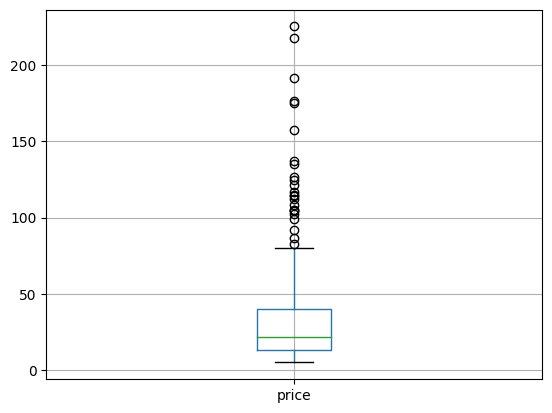

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column=['price'])

In [ ]:
#Autre méthode avec plotly express
fig = px.box(df_merge, y="price", title='Graphique boîte à moustache des prix')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#Calculer la moyenne du prix
df_mean=df_merge['price'].mean()
print('La moyenne du prix est: ', df_mean)
#Calculer l'écart-type du prix
df_std= df_merge['price'].std()
print("L'écart-type des prix est :", df_std)
#Calculer le Z-score
df_merge['z-score']=(df_merge['price']- df_mean)/df_std

La moyenne du prix est:  31.369558101473
L'écart-type des prix est : 27.92914611869041


In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_merge_z=df_merge[df_merge['z-score']>3]
print("Le seuil prix dont z-score est supérieur à 3 est de: {}".format(df_merge_z['price'].min()))

Le seuil prix dont z-score est supérieur à 3 est de: 116.4


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count,Millésime,z-score
count,611.000000,611.0,611.000000,611.000000,611.0,611.0,611.0,611.0,611.000000,611.0,611.0,611.0,611.0,553.000000,6.110000e+02
mean,4984.363339,1.0,31.369558,32.157119,0.0,0.0,0.0,0.0,4.286416,2.0,0.0,0.0,0.0,2014.406872,-1.976960e-16
std,783.679093,0.0,27.929146,50.736912,0.0,0.0,0.0,0.0,8.934266,0.0,0.0,0.0,0.0,36.131740,1.000000e+00
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,0.0,0.0,1270.000000,-9.369981e-01
25%,4261.500000,1.0,13.500000,4.000000,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,0.0,0.0,2016.000000,-6.398176e-01
50%,4757.000000,1.0,22.100000,16.000000,0.0,0.0,0.0,0.0,1.000000,2.0,0.0,0.0,0.0,2017.000000,-3.318955e-01
75%,5618.500000,1.0,40.350000,37.000000,0.0,0.0,0.0,0.0,5.000000,2.0,0.0,0.0,0.0,2018.000000,3.215437e-01
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,2.0,0.0,0.0,0.0,2019.000000,6.932917e+00


In [ ]:
#Définissez un seuil pour les articles "outliers" en prix
# Calculer le premier quartile (Q1) et le troisième quartile (Q3)
Q1 = df_merge['price'].quantile(0.25)
Q3 = df_merge['price'].quantile(0.75)

# Calculer l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définir les seuils pour les valeurs aberrantes
seuil_inf = Q1 - 1.5 * IQR
seuil_sup = Q3 + 1.5 * IQR

print(f'Seuil inférieur: {seuil_inf}')
print(f'Seuil supérieur: {seuil_sup}')

Seuil inférieur: -26.775000000000006
Seuil supérieur: 80.625


In [ ]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outliers = df_merge[(df_merge['price'] < seuil_inf) | (df_merge['price'] > seuil_sup)]
outliers

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z-score
183,4337,1.0,83.0,13.0,4679,4679,0,0,0,0.0,...,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",2007.0,6-8 ans,75cl,12%,10°C,"Coquilles Saint Jacques, Foie gras, Poissons, ...",1.848622
186,4352,1.0,225.0,0.0,15940,15940,0,0,0,0.0,...,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",2008.0,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",6.932917
188,4355,1.0,126.5,2.0,12589,12589,0,0,0,0.0,...,Champagne,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",3.406135
204,4402,1.0,176.0,8.0,3510,3510,0,0,0,0.0,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.178477
205,4404,1.0,108.5,2.0,3507,3507,0,0,0,0.0,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,41%,NaN,NaN,2.761647
207,4406,1.0,157.0,3.0,7819,7819,0,0,0,0.0,...,Cognac Grande Champagne 1er Cru,NaN,NaN,1989.0,NaN,70cl,"41,30%",NaN,NaN,4.498184
208,4407,1.0,104.0,6.0,3509,3509,0,0,0,0.0,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,2.600525
347,4903,1.0,102.3,20.0,14805,14805,0,0,0,0.0,...,Corton,Rouge,Pinot Noir,2017.0,15 ans et +,75cl,"13,50%",15°C,"Boeuf bourguignon, Viande Blanche, Viande en s...",2.539657
348,4904,1.0,137.0,13.0,14220,14220,0,0,0,0.0,...,Corton Charlemagne,Blanc,Chardonnay,2016.0,15 ans et +,75cl,13%,12°C,"Poissons nobles, Viande Blanche, Volaille",3.782086
383,5001,1.0,217.5,20.0,14581,14581,0,0,0,0.0,...,Charmes-Chambertin Grand Cru,Rouge,Pinot Noir,2014.0,15 ans et +,75cl,"13,50%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
outliers['Appellation']

183                          Champagne
186                          Champagne
188                          Champagne
204    Cognac Grande Champagne 1er Cru
205    Cognac Grande Champagne 1er Cru
207    Cognac Grande Champagne 1er Cru
208    Cognac Grande Champagne 1er Cru
347                             Corton
348                 Corton Charlemagne
383       Charmes-Chambertin Grand Cru
384                     Volnay 1er Cru
385                     Volnay 1er Cru
388                          Champagne
389                          Champagne
443                             Bandol
451                   Alsace Grand Cru
487                    Clos de Vougeot
514                 Coteaux Champenois
528                                NaN
552                          Champagne
557                Echezeaux Grand Cru
562                     Volnay 1er Cru
563                     Volnay 1er Cru
564                     Volnay 1er Cru
Name: Appellation, dtype: object

> **Tous les articles non null sont des grands vins ou des grands champagnes. L'outlier est donc justifié.**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [ ]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['CA'] = df_merge['price'] * df_merge['total_sales']
#Calculez la somme de la colonne "ca_par_article"
total_CA = df_merge['CA'].sum()
print('Le chiffre d\'affaires total est de :', total_CA)
df_merge.head()
#Ce résultat correspond au chiffre d'affaire du site web


Le chiffre d'affaires total est de : 63637.4


,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z-score,CA
0,3847,1.0,24.2,0.0,15298,15298,0,0,0,0.0,...,Rouge,100% Syrah,2018.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.256705,145.2
1,3849,1.0,34.3,0.0,15296,15296,0,0,0,0.0,...,Rouge,100% Syrah,2017.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.104924,0.0
2,3850,1.0,20.8,0.0,15300,15300,0,0,0,0.0,...,Rouge,100% Syrah,2018.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille",-0.378442,0.0
3,4032,1.0,14.1,0.0,19814,19814,0,0,0,0.0,...,Rouge,100% Syrah,2018.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.618335,42.3
4,4039,1.0,46.0,0.0,19815,19815,0,0,0,0.0,...,Rouge,100% Syrah,2017.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge",0.523841,0.0


In [ ]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge=df_merge.sort_values('CA', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_merge = df_merge.reset_index(drop=True)
#Afficher les 20 premier articles en CA
df_merge_20=df_merge.head(20)
df_merge_20

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z-score,CA
0,4334,1.0,49.0,0.0,7818,7818,0,0,0,0.0,...,Blanc,Chardonnay,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",0.631256,4704.0
1,4144,1.0,49.0,11.0,1662,1662,0,0,0,0.0,...,rose,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",0.631256,4263.0
2,4402,1.0,176.0,8.0,3510,3510,0,0,0,0.0,...,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.178477,2288.0
3,4142,1.0,53.0,8.0,11641,11641,0,0,0,0.0,...,Blanc,"44% Chardonnay, 56% Pinot Noir",2006.0,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",0.774476,1590.0
4,4141,1.0,39.0,1.0,304,304,0,0,0,0.0,...,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",0.273207,1560.0
5,4355,1.0,126.5,2.0,12589,12589,0,0,0,0.0,...,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",3.406135,1391.5
6,4352,1.0,225.0,0.0,15940,15940,0,0,0,0.0,...,Blanc,"30% Chardonnay, 70% Pinot Noir",2008.0,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",6.932917,1125.0
7,4153,1.0,29.0,0.0,16237,16237,0,0,0,0.0,...,Rouge,"Abouriou, Cabernet Franc, Cabernet Sauvignon, ...",2015.0,10-15 ans,75cl,13%,16°C,"Gibier, Grillades, Viande rouge",-0.084842,1044.0
8,6206,1.0,25.2,120.0,16580,16580,0,0,0,0.0,...,Blanc,Vermentino,2019.0,3-5 ans,75cl,"13,50%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",-0.220900,1033.2
9,4068,1.0,16.6,157.0,16416,16416,0,0,0,0.0,...,Rouge,100% Syrah,2019.0,3-5 ans,75cl,"13,50%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",-0.528822,1029.2


In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
fig_best_sale = px.bar(df_merge_20, x='post_title', y='CA', title='20 meilleures ventes')
fig_best_sale.show()

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['CA_part'] = (df_merge['CA'] / total_CA) * 100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['CA_part_cumulative'] = df_merge['CA_part'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
row_80_percent = df_merge[df_merge['CA_part_cumulative'] >= 80].iloc[0]
num_articles_80_percent = row_80_percent.name + 1
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print(f"Nombre d'articles représentant 80% du CA : {num_articles_80_percent}")


Nombre d'articles représentant 80% du CA : 114


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [ ]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge=df_merge.sort_values('total_sales', ascending=False)

In [ ]:
#Réinitialiser l'index du dataset par un reset_index
df_merge = df_merge.reset_index(drop=True)

In [ ]:
#Afficher les 20 premier articles en quantitté
df_merge_20_tsales=df_merge.head(20)
df_merge_20_tsales

,product_id,onsale_web,price,stock_quantity,id_web,sku,virtual,downloadable,rating_count,average_rating,...,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z-score,CA,CA_part,CA_part_cumulative
0,4334,1.0,49.0,0.0,7818,7818,0,0,0,0.0,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",0.631256,4704.0,7.391880,7.391880
1,4144,1.0,49.0,11.0,1662,1662,0,0,0,0.0,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",0.631256,4263.0,6.698891,14.090771
2,4068,1.0,16.6,157.0,16416,16416,0,0,0,0.0,...,2019.0,3-5 ans,75cl,"13,50%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",-0.528822,1029.2,1.617288,31.471902
3,4200,1.0,5.8,190.0,16295,16295,0,0,0,0.0,...,2019.0,2 ans,75cl,12%,11°C,"Apéritif, Grillades, Légumes croquants, Salade",-0.915515,266.8,0.419250,60.272104
4,4172,1.0,5.7,167.0,16210,16210,0,0,0,0.0,...,2019.0,3 ans,75cl,"12,50%",11°C,"Apéritif, Poissons, Volaille",-0.919096,245.1,0.385151,62.253958
5,4187,1.0,13.3,90.0,16189,16189,0,0,0,0.0,...,2019.0,3-5 ans,75cl,"13,50%",14°C,"Agneau, Charcuterie, Grillades",-0.646979,558.6,0.877786,48.004790
6,6206,1.0,25.2,120.0,16580,16580,0,0,0,0.0,...,2019.0,3-5 ans,75cl,"13,50%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",-0.220900,1033.2,1.623574,29.854614
7,4141,1.0,39.0,1.0,304,304,0,0,0,0.0,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",0.273207,1560.0,2.451389,22.636060
8,6047,1.0,10.9,46.0,16264,16264,0,0,0,0.0,...,2019.0,3 ans,75cl,14%,14°C,"Apéritif, Charcuterie, Volaille",-0.732910,414.2,0.650875,53.779853
9,4729,1.0,8.6,151.0,38,38,0,0,0,0.0,...,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons",-0.815262,326.8,0.513534,56.701248


In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
fig_best_sale = px.bar(df_merge_20_tsales, x='post_title', y='total_sales', title='20 premiers articles en quantité')
fig_best_sale.show()

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################
total_qte = df_merge['total_sales'].sum()
print('La quantité totale de produits vendus est de: ', total_qte)

La quantité totale de produits vendus est de:  2619.0


In [ ]:
#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge['qte_part'] = (df_merge['total_sales'] / total_qte) * 100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['Qte_part_cumulative'] = df_merge['qte_part'].cumsum()


In [ ]:
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['Qte_part_cumulative'] = df_merge['qte_part'].cumsum()


In [ ]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
row_80_percent_qte = df_merge[df_merge['Qte_part_cumulative'] >= 80].iloc[0]
num_articles_80_percent_qte = row_80_percent_qte.name + 1


In [ ]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print(f"Nombre d'articles représentant 80% des quantités : {num_articles_80_percent_qte}")

Nombre d'articles représentant 80% des quantités : 135


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
#df_merge.to_excel('/content/drive/MyDrive/PROJETS OPENCLASSROOMS/PROJET 6/bottleneck4.xlsx', index=False)